<a href="https://colab.research.google.com/github/Farouk96/Audio-Classification/blob/master/P7_02_02_New_methode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!git clone https://github.com/Farouk96/Audio-Classification.git

In [2]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import json
import utils
import validate
import argparse
import densenet
import resnet
import inception
import time
import datasetaug
import datasetnormal
import matplotlib.pyplot as plt

from tqdm import tqdm

In [3]:
!pip install tensorboardX

     |████████████████████████████████| 125 kB 6.9 MB/s 


In [4]:
from tensorboardX import SummaryWriter

#Audio preprocessing(normalisation-augmentation)

In [ ]:
!python /content/preprocessingGTZAN.py   --sampling_rate 22050

Finished audio {'name': '/content/drive/MyDrive/P07_ dog_cate_voice_classification/data/ cat_dogs/train/cat/cat_101.wav', 'class_idx': 0}
Finished audio {'name': '/content/drive/MyDrive/P07_ dog_cate_voice_classification/data/ cat_dogs/train/cat/cat_107.wav', 'class_idx': 0}
Finished audio {'name': '/content/drive/MyDrive/P07_ dog_cate_voice_classification/data/ cat_dogs/train/cat/cat_105.wav', 'class_idx': 0}
Finished audio {'name': '/content/drive/MyDrive/P07_ dog_cate_voice_classification/data/ cat_dogs/train/cat/cat_141.wav', 'class_idx': 0}
Finished audio {'name': '/content/drive/MyDrive/P07_ dog_cate_voice_classification/data/ cat_dogs/train/cat/cat_121.wav', 'class_idx': 0}
Finished audio {'name': '/content/drive/MyDrive/P07_ dog_cate_voice_classification/data/ cat_dogs/train/cat/cat_122.wav', 'class_idx': 0}
Finished audio {'name': '/content/drive/MyDrive/P07_ dog_cate_voice_classification/data/ cat_dogs/train/cat/cat_134.wav', 'class_idx': 0}
Finished audio {'name': '/content/

#Deep learning with transfer learning methodes

##Densenet

###Pretrained

In [ ]:
!python /content/train.py --config_path /content/gtzan_densenet.json

100% 84/84 [01:26<00:00,  1.03s/it, loss=0.676]
Epoch 0/20 Loss:0.6756492589289943 Valid Acc:83.33333333333333
100% 84/84 [01:27<00:00,  1.04s/it, loss=0.302]
Epoch 1/20 Loss:0.30200273712121306 Valid Acc:83.33333333333333
100% 84/84 [01:24<00:00,  1.01s/it, loss=0.204]
Epoch 2/20 Loss:0.20373235917317548 Valid Acc:80.95238095238095
100% 84/84 [01:27<00:00,  1.04s/it, loss=0.188]
Epoch 3/20 Loss:0.18784215167120455 Valid Acc:88.0952380952381
100% 84/84 [01:26<00:00,  1.02s/it, loss=0.219]
Epoch 4/20 Loss:0.2194781554862857 Valid Acc:83.33333333333333
100% 84/84 [01:27<00:00,  1.04s/it, loss=0.126]
Epoch 5/20 Loss:0.1262490794428491 Valid Acc:83.33333333333333
100% 84/84 [01:25<00:00,  1.01s/it, loss=0.130]
Epoch 6/20 Loss:0.12954515275556505 Valid Acc:88.0952380952381
100% 84/84 [01:23<00:00,  1.01it/s, loss=0.074]
Epoch 7/20 Loss:0.0744552226249306 Valid Acc:88.0952380952381
100% 84/84 [01:27<00:00,  1.04s/it, loss=0.067]
Epoch 8/20 Loss:0.06707235110003412 Valid Acc:85.71428571428571

In [ ]:
val_loss=[0.676,0.302,0.204,0.188,0.219,0.126,0.130,0.074,0.067,0.057,0.069,0.025,0.014,0.026,0.091,0.037,0.087,0.109,0.054,0.079]
len(val_loss)

20

In [ ]:
val_acc=[83.33,83.33,80.95,88.09,83.33,83.33,88.09,88.09,85.71,85.71,88.09,85.71,88.09,88.09,83.33,90.47,85.71,88.09,85.71,88.09]
len(val_acc)

20

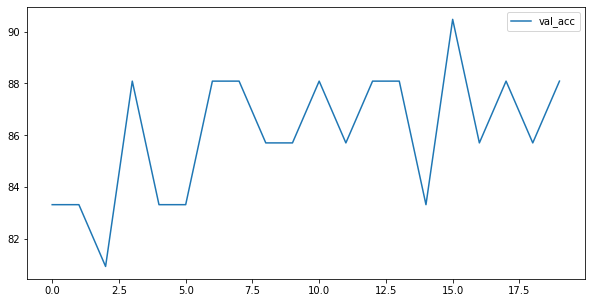

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(Epoch,val_acc)
plt.legend(['val_acc'])

In [ ]:
#"lr": 1e-5
!python /content/train.py --config_path /content/gtzan_densenet.json

100% 84/84 [01:32<00:00,  1.10s/it, loss=2.015]
Epoch 0/20 Loss:2.0152207087902796 Valid Acc:78.57142857142857
100% 84/84 [01:32<00:00,  1.10s/it, loss=1.156]
Epoch 1/20 Loss:1.1559591140775454 Valid Acc:83.33333333333333
100% 84/84 [01:32<00:00,  1.10s/it, loss=0.724]
Epoch 2/20 Loss:0.7243603381017844 Valid Acc:85.71428571428571
100% 84/84 [01:34<00:00,  1.12s/it, loss=0.456]
Epoch 3/20 Loss:0.4556239195877597 Valid Acc:88.0952380952381
100% 84/84 [01:31<00:00,  1.09s/it, loss=0.424]
Epoch 4/20 Loss:0.4240851785455431 Valid Acc:88.0952380952381
100% 84/84 [01:31<00:00,  1.09s/it, loss=0.353]
Epoch 5/20 Loss:0.3534320866955178 Valid Acc:88.0952380952381
100% 84/84 [01:31<00:00,  1.08s/it, loss=0.286]
Epoch 6/20 Loss:0.2862810381200342 Valid Acc:88.0952380952381
100% 84/84 [01:28<00:00,  1.05s/it, loss=0.211]
Epoch 7/20 Loss:0.21074521723425105 Valid Acc:88.0952380952381
100% 84/84 [01:30<00:00,  1.08s/it, loss=0.272]
Epoch 8/20 Loss:0.27188426772842095 Valid Acc:88.0952380952381
100% 

NameError: ignored

###Random

In [ ]:
!python /content/train.py --config_path /content/_random_densenet.json
#[0.704,0.290,0.217,0.187,0.180,0.180,0.183,0.167,0.118,0.124,0.115,0.089,0.047,0.073,0.059,0.051,

100% 84/84 [01:26<00:00,  1.02s/it, loss=0.704]
Epoch 0/20 Loss:0.7044380909452835 Valid Acc:80.95238095238095
100% 84/84 [01:26<00:00,  1.02s/it, loss=0.290]
Epoch 1/20 Loss:0.28969705550532254 Valid Acc:73.80952380952381
100% 84/84 [01:26<00:00,  1.03s/it, loss=0.217]
Epoch 2/20 Loss:0.2172006827313453 Valid Acc:80.95238095238095
100% 84/84 [01:26<00:00,  1.03s/it, loss=0.187]
Epoch 3/20 Loss:0.18687050975859165 Valid Acc:73.80952380952381
100% 84/84 [01:28<00:00,  1.06s/it, loss=0.180]
Epoch 4/20 Loss:0.18001406205197176 Valid Acc:85.71428571428571
100% 84/84 [01:24<00:00,  1.01s/it, loss=0.183]
Epoch 5/20 Loss:0.1826852174985799 Valid Acc:83.33333333333333
100% 84/84 [01:26<00:00,  1.03s/it, loss=0.167]
Epoch 6/20 Loss:0.16685955658266766 Valid Acc:80.95238095238095
100% 84/84 [01:23<00:00,  1.00it/s, loss=0.118]
Epoch 7/20 Loss:0.11784835681984467 Valid Acc:80.95238095238095
100% 84/84 [01:21<00:00,  1.03it/s, loss=0.124]
Epoch 8/20 Loss:0.12416497349650377 Valid Acc:85.7142857142

In [ ]:
Val_loss=[0.704,0.290,0.217,0.187,0.180,0.180,0.183,0.167,0.118,0.124,0.115,0.089,0.047,0.073,0.059,0.051,0.046,0.019,0.062,0.040]
len(val_loss)

20

In [ ]:
val_acc=[80.95,73.80,80.95,73.80,85.71,80.95,83.33,80.95,80.95,85.71,80.95,80.95,78.57,83.33,80.95,80.95,85.71,88.09,83.33,80.95]
len(val_acc)

20

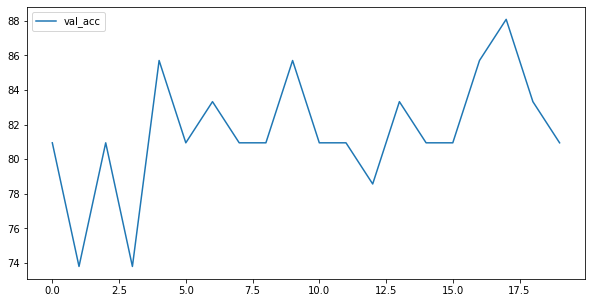

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(Epoch,val_acc)
plt.legend(['val_acc'])

In [ ]:
#"lr": 1e-5
!python /content/train.py --config_path /content/_random_densenet.json

100% 84/84 [01:29<00:00,  1.06s/it, loss=1.799]
Epoch 0/20 Loss:1.7985555756659735 Valid Acc:57.142857142857146
100% 84/84 [01:28<00:00,  1.05s/it, loss=1.059]
Epoch 1/20 Loss:1.058608933928467 Valid Acc:59.523809523809526
100% 84/84 [01:32<00:00,  1.10s/it, loss=0.704]
Epoch 2/20 Loss:0.7040681008781705 Valid Acc:66.66666666666667
100% 84/84 [01:33<00:00,  1.11s/it, loss=0.529]
Epoch 3/20 Loss:0.5287842771836689 Valid Acc:69.04761904761905
100% 84/84 [01:30<00:00,  1.08s/it, loss=0.437]
Epoch 4/20 Loss:0.4371587555145934 Valid Acc:76.19047619047619
100% 84/84 [01:31<00:00,  1.09s/it, loss=0.416]
Epoch 5/20 Loss:0.41623910223799093 Valid Acc:80.95238095238095
100% 84/84 [01:31<00:00,  1.08s/it, loss=0.335]
Epoch 6/20 Loss:0.3350112908298061 Valid Acc:88.0952380952381
100% 84/84 [01:30<00:00,  1.08s/it, loss=0.235]
Epoch 7/20 Loss:0.23548723553263007 Valid Acc:85.71428571428571
100% 84/84 [01:30<00:00,  1.08s/it, loss=0.193]
Epoch 8/20 Loss:0.1930444946823021 Valid Acc:80.95238095238095

##Resnet

###Random

In [ ]:
!python /content/train.py --config_path /content/random_resnet.json
#[73.80,76.19,69.04,71.42,69.04,78.57,83.33,73.80,83.33,73.80,78.57,85.71,90.47,83.33,83.33,83.33]

100% 84/84 [01:18<00:00,  1.07it/s, loss=0.607]
Epoch 0/20 Loss:0.6068018675293951 Valid Acc:73.80952380952381
100% 84/84 [01:20<00:00,  1.04it/s, loss=0.310]
Epoch 1/20 Loss:0.3101332749772285 Valid Acc:76.19047619047619
100% 84/84 [01:19<00:00,  1.06it/s, loss=0.301]
Epoch 2/20 Loss:0.3005037334029718 Valid Acc:69.04761904761905
100% 84/84 [01:19<00:00,  1.06it/s, loss=0.184]
Epoch 3/20 Loss:0.18355147912543976 Valid Acc:71.42857142857143
100% 84/84 [01:18<00:00,  1.07it/s, loss=0.121]
Epoch 4/20 Loss:0.1207052375296674 Valid Acc:69.04761904761905
100% 84/84 [01:16<00:00,  1.10it/s, loss=0.154]
Epoch 5/20 Loss:0.15441681164832385 Valid Acc:78.57142857142857
100% 84/84 [01:17<00:00,  1.08it/s, loss=0.111]
Epoch 6/20 Loss:0.11125332374996062 Valid Acc:83.33333333333333
100% 84/84 [01:19<00:00,  1.06it/s, loss=0.079]
Epoch 7/20 Loss:0.07889364591946582 Valid Acc:73.80952380952381
100% 84/84 [01:19<00:00,  1.06it/s, loss=0.056]
Epoch 8/20 Loss:0.05602130915143616 Valid Acc:83.33333333333

In [ ]:
val_acc=[73.80,76.19,69.04,71.42,69.04,78.57,83.33,73.80,83.33,73.80,78.57,85.71,90.47,83.33,83.33,83.33,73.80,83.33,83.33,76.19]
len(val_acc)

20

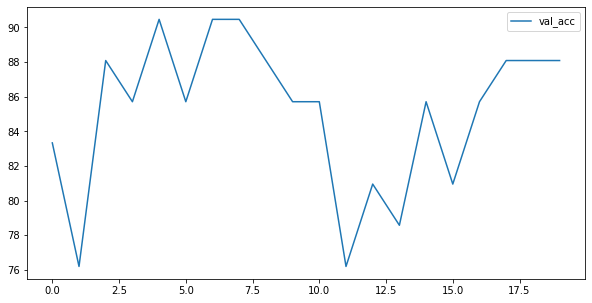

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(Epoch,val_acc)
plt.legend(['val_acc'])

In [6]:
#lr=1e-5
!python /content/train.py --config_path /content/random_resnet.json

100% 84/84 [01:20<00:00,  1.05it/s, loss=1.134]
Epoch 0/20 Loss:1.1343898656112807 Valid Acc:66.66666666666667
100% 84/84 [01:21<00:00,  1.03it/s, loss=0.580]
Epoch 1/20 Loss:0.5797498227939719 Valid Acc:69.04761904761905
100% 84/84 [01:18<00:00,  1.06it/s, loss=0.512]
Epoch 2/20 Loss:0.5120657061537107 Valid Acc:76.19047619047619
100% 84/84 [01:14<00:00,  1.12it/s, loss=0.418]
Epoch 3/20 Loss:0.4176021428069189 Valid Acc:69.04761904761905
100% 84/84 [01:14<00:00,  1.13it/s, loss=0.384]
Epoch 4/20 Loss:0.38403831976687625 Valid Acc:71.42857142857143
100% 84/84 [01:16<00:00,  1.10it/s, loss=0.334]
Epoch 5/20 Loss:0.33380370848767815 Valid Acc:69.04761904761905
100% 84/84 [01:14<00:00,  1.13it/s, loss=0.337]
Epoch 6/20 Loss:0.33697876436192364 Valid Acc:71.42857142857143
100% 84/84 [01:15<00:00,  1.12it/s, loss=0.290]
Epoch 7/20 Loss:0.2899276791583924 Valid Acc:69.04761904761905
100% 84/84 [01:14<00:00,  1.13it/s, loss=0.293]
Epoch 8/20 Loss:0.2928679106712696 Valid Acc:76.1904761904761

###Pretrained

In [ ]:
!python /content/train.py --config_path /content/Pretrained_resnet.json
#[83.33,76.19,88.09,85.71,90.47,85.71,90.47,90.47,88.09,85.71,85.71,76.19,80.95,78.57]

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100% 97.8M/97.8M [00:00<00:00, 153MB/s]
100% 84/84 [01:13<00:00,  1.14it/s, loss=0.569]
Epoch 0/20 Loss:0.5686742772924758 Valid Acc:83.33333333333333
100% 84/84 [01:17<00:00,  1.08it/s, loss=0.281]
Epoch 1/20 Loss:0.28079461133373634 Valid Acc:76.19047619047619
100% 84/84 [01:13<00:00,  1.14it/s, loss=0.181]
Epoch 2/20 Loss:0.18147596016171433 Valid Acc:88.0952380952381
100% 84/84 [01:16<00:00,  1.09it/s, loss=0.151]
Epoch 3/20 Loss:0.1510360849178618 Valid Acc:85.71428571428571
100% 84/84 [01:14<00:00,  1.12it/s, loss=0.096]
Epoch 4/20 Loss:0.09627104102401063 Valid Acc:90.47619047619048
100% 84/84 [01:15<00:00,  1.11it/s, loss=0.055]
Epoch 5/20 Loss:0.0549531704205687 Valid Acc:85.71428571428571
100% 84/84 [01:13<00:00,  1.14it/s, loss=0.064]
Epoch 6/20 Loss:0.0644221903431961 Valid Acc:90.47619047619048
100% 84/84 [01:15<00:00,  1.11it/s, loss=0.037]


In [ ]:
val_acc=[83.33,76.19,88.09,85.71,90.47,85.71,90.47,90.47,88.09,85.71,85.71,76.19,80.95,78.57,85.71,80.95,85.71,88.09,88.09,88.09]
len(val_acc)

20

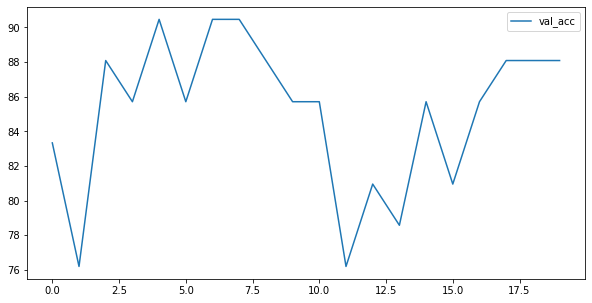

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(Epoch,val_acc)
plt.legend(['val_acc'])

In [7]:
#lr=1e-5
!python /content/train.py --config_path /content/Pretrained_resnet.json

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100% 97.8M/97.8M [00:00<00:00, 177MB/s]
100% 84/84 [01:16<00:00,  1.09it/s, loss=1.648]
Epoch 0/20 Loss:1.6479083136433648 Valid Acc:69.04761904761905
100% 84/84 [01:18<00:00,  1.07it/s, loss=0.766]
Epoch 1/20 Loss:0.7663900646425429 Valid Acc:83.33333333333333
100% 84/84 [01:16<00:00,  1.10it/s, loss=0.414]
Epoch 2/20 Loss:0.41426640358709155 Valid Acc:85.71428571428571
100% 84/84 [01:17<00:00,  1.08it/s, loss=0.274]
Epoch 3/20 Loss:0.27350031469194663 Valid Acc:85.71428571428571
100% 84/84 [01:18<00:00,  1.07it/s, loss=0.199]
Epoch 4/20 Loss:0.1991617596442146 Valid Acc:85.71428571428571
100% 84/84 [01:16<00:00,  1.10it/s, loss=0.183]
Epoch 5/20 Loss:0.1829822538864045 Valid Acc:88.0952380952381
100% 84/84 [01:15<00:00,  1.11it/s, loss=0.208]
Epoch 6/20 Loss:0.20820074476346018 Valid Acc:85.71428571428571
100% 84/84 [01:18<00:00,  1.07it/s, loss=0.191]


##Inception

###Random

In [ ]:
!python /content/train.py --config_path /content/random_inception.json
#[76.19,76.19,85.71,83.33,78.57,78.57,80.95,80.95,83.33,85.71,73.80,80.95,80.95,]

/usr/local/lib/python3.7/dist-packages/torchvision/models/inception.py:83: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  ' due to scipy/scipy#11299), please set init_weights=True.', FutureWarning)
100% 84/84 [01:17<00:00,  1.09it/s, loss=0.877]
Epoch 0/20 Loss:0.8774094051193624 Valid Acc:76.19047619047619
100% 84/84 [01:14<00:00,  1.13it/s, loss=0.399]
Epoch 1/20 Loss:0.39917244717833544 Valid Acc:76.19047619047619
100% 84/84 [01:14<00:00,  1.13it/s, loss=0.345]
Epoch 2/20 Loss:0.34478039755707696 Valid Acc:85.71428571428571
100% 84/84 [01:20<00:00,  1.04it/s, loss=0.343]
Epoch 3/20 Loss:0.3426009215237129 Valid Acc:83.33333333333333
100% 84/84 [01:18<00:00,  1.06it/s, loss=0.288]
Epoch 4/20 Loss:0.28789407209981055 Valid Acc:78.57142857142857
100% 84/84 [01:13<00:00,  1.14it/s, l

In [ ]:
val_acc=[76.19,76.19,85.71,83.33,78.57,78.57,80.95,80.95,83.33,85.71,73.80,80.95,80.95,83.33,73.8,73.8,80.95,73.8,85.71,85.71]
len(val_acc)

20

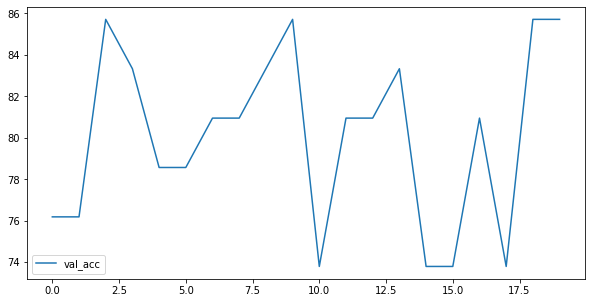

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(Epoch,val_acc)
plt.legend(['val_acc'])

In [8]:
#lr=1e-5
!python /content/train.py --config_path /content/random_inception.json

/usr/local/lib/python3.7/dist-packages/torchvision/models/inception.py:83: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  ' due to scipy/scipy#11299), please set init_weights=True.', FutureWarning)
100% 84/84 [01:14<00:00,  1.12it/s, loss=1.926]
Epoch 0/20 Loss:1.9257173467250097 Valid Acc:47.61904761904762
100% 84/84 [01:13<00:00,  1.14it/s, loss=1.374]
Epoch 1/20 Loss:1.373543871300561 Valid Acc:59.523809523809526
100% 84/84 [01:15<00:00,  1.11it/s, loss=1.010]
Epoch 2/20 Loss:1.0099420703592754 Valid Acc:64.28571428571429
100% 84/84 [01:16<00:00,  1.09it/s, loss=0.823]
Epoch 3/20 Loss:0.8225650688012441 Valid Acc:71.42857142857143
100% 84/84 [01:13<00:00,  1.14it/s, loss=0.692]
Epoch 4/20 Loss:0.6917971734489713 Valid Acc:71.42857142857143
100% 84/84 [01:15<00:00,  1.12it/s, loss

###Pretrained

In [ ]:
!python /content/train.py --config_path  /content/Pretrained_inception.json
#[88.09,88.09,92.85,76.19,80.95,88.09,83.33,88.09,92.85,88.09,83.33,88.09,83.33,78.57,85.71,]

100% 84/84 [01:19<00:00,  1.06it/s, loss=0.828]
Epoch 0/20 Loss:0.8280370514839888 Valid Acc:88.0952380952381
100% 84/84 [01:19<00:00,  1.05it/s, loss=0.299]
Epoch 1/20 Loss:0.2994197599501127 Valid Acc:88.0952380952381
100% 84/84 [01:16<00:00,  1.10it/s, loss=0.167]
Epoch 2/20 Loss:0.16746170965156384 Valid Acc:92.85714285714286
100% 84/84 [01:17<00:00,  1.08it/s, loss=0.171]
Epoch 3/20 Loss:0.17091196181995438 Valid Acc:76.19047619047619
100% 84/84 [01:16<00:00,  1.10it/s, loss=0.170]
Epoch 4/20 Loss:0.17017426805215932 Valid Acc:80.95238095238095
100% 84/84 [01:18<00:00,  1.07it/s, loss=0.123]
Epoch 5/20 Loss:0.12335970234735646 Valid Acc:88.0952380952381
100% 84/84 [01:20<00:00,  1.04it/s, loss=0.149]
Epoch 6/20 Loss:0.1485633547196076 Valid Acc:83.33333333333333
100% 84/84 [01:17<00:00,  1.09it/s, loss=0.144]
Epoch 7/20 Loss:0.1440118643194659 Valid Acc:88.0952380952381
100% 84/84 [01:16<00:00,  1.10it/s, loss=0.273]
Epoch 8/20 Loss:0.27336830233356785 Valid Acc:92.85714285714286


In [ ]:
val_acc=[88.09,88.09,92.85,76.19,80.95,88.09,83.33,88.09,92.85,88.09,90.47,83.33,88.09,83.33,78.57,85.71,83.33,85.71,90.47,85.71]
print(len(val_acc))
Epoch=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

20


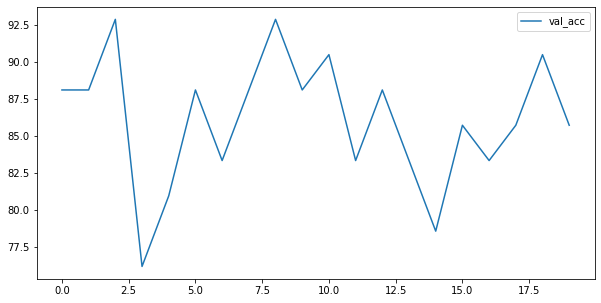

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

plt.plot(Epoch,val_acc)
plt.legend(['val_acc'])

In [ ]:
#lr=1e-5
!python /content/train.py --config_path  /content/Pretrained_inception.json